In [1]:
import numpy as np
import cvxpy as cp
from itertools import product
import matplotlib.pyplot as plt
from fixed_support import fixed_support

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
# select k
K = 40

# select cifre to analyze
digit = 3

# Save p_k
p_k = [np.array(digits.images[k].flatten()) for k in np.where(digits.target == digit)[0][0:K]]

# Define support for T
N = len(p_k[0])

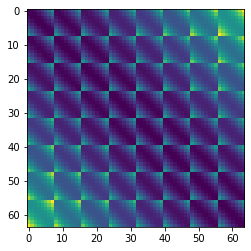

In [4]:
# Define support for xi
N_euc = int(np.sqrt(N))

# Create cost matrix (l-2 norm used for the moment)
c = np.zeros((N, N))
for i, mi in enumerate(list(product(np.arange(N_euc), np.arange(N_euc)))):
    for j, mj in enumerate(list(product(np.arange(N_euc), np.arange(N_euc)))):
        c[i, j] = np.linalg.norm(np.array(mi)- np.array(mj), 2)**2 # l-2 norm
        #c[i, j] = np.linalg.norm(np.array(mi)- np.array(mj), 1) # l-1 norm

# Plot
plt.imshow(c)

In [5]:
p = fixed_support(c, p_k)

In [6]:
p_opt = [p[i*N_euc:N_euc*(i + 1)] for i in range(N_euc)]

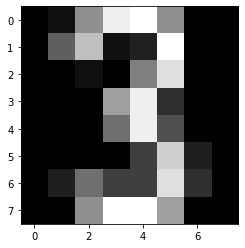

In [7]:
plt.gray()
plt.imshow(p_opt)